In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data = pd.read_csv('E:\Data Science project.covid_19_india.csv\covid_19_india.Xls.csv')
                   

In [85]:
data.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [86]:

data['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana'],
      dtype=object)

In [87]:
df = data.loc[(data['State/UnionTerritory']=='Tamil Nadu')]

In [88]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
61,62,07-03-2020,6:00 PM,Tamil Nadu,1,0,0,0,1
67,68,08-03-2020,6:00 PM,Tamil Nadu,1,0,0,0,1
79,80,09-03-2020,6:00 PM,Tamil Nadu,1,0,0,0,1
94,95,10-03-2020,6:00 PM,Tamil Nadu,1,0,0,0,1
105,106,11-03-2020,6:00 PM,Tamil Nadu,1,0,0,0,1


In [89]:
import plotly.offline as py
import plotly.graph_objs as go

In [90]:
cured_rate = go.Scatter(x=df['Date'],y=df['Cured'],name='Cured Rate')
death_rate = go.Scatter(x=df['Date'],y=df['Deaths'],name='Death Rate')
py.iplot([cured_rate,death_rate])

In [91]:
df1 =df[['Confirmed']]

In [92]:
df1=df1.values

In [93]:
type(df1)

numpy.ndarray

In [94]:
train_size =int(len(df1) *0.80)
test_size  =len(df1) - train_size

In [95]:
train,test = df1[0:train_size,:],df1[train_size:len(df1),:]

In [96]:
train

array([[    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    2],
       [    3],
       [    3],
       [    7],
       [    9],
       [   15],
       [   18],
       [   26],
       [   29],
       [   40],
       [   49],
       [   67],
       [   74],
       [  234],
       [  234],
       [  309],
       [  411],
       [  485],
       [  571],
       [  621],
       [  690],
       [  738],
       [  834],
       [  911],
       [  969],
       [ 1075],
       [ 1173],
       [ 1204],
       [ 1242],
       [ 1267],
       [ 1323],
       [ 1372],
       [ 1477],
       [ 1520],
       [ 1596],
       [ 1629],
       [ 1683],
       [ 1755],
       [ 1821],
       [ 1885],
       [ 1937],
       [ 2058],
       [ 2162],
       [ 2323],
       [ 2526],
       [ 2757],
       [ 3023],
       [ 3550],
       [ 4058],
       [ 4829],
       [

In [97]:
test

array([[23495],
       [24586],
       [25872],
       [27256],
       [28694],
       [30152],
       [31667],
       [33229],
       [34914],
       [36841],
       [38716],
       [40698],
       [42687],
       [44661],
       [46504],
       [48019],
       [50193],
       [52334],
       [54449],
       [56845],
       [59377],
       [62087]], dtype=int64)

In [98]:
def create_dataset(dataset,look_back=1):
      datax,datay=[],[]
      for i in range(len(dataset)-look_back-1):
            a=dataset[i:(i+look_back),0]
            datax.append(a)
            datay.append(dataset[i+look_back,0])
      return np.array(datax),np.array(datay)

In [99]:
look_back=2
trainx,trainy=create_dataset(train,look_back=look_back)
testx,testy=create_dataset(test,look_back=look_back)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
model=LinearRegression()

In [102]:
model.fit(trainx,trainy)

LinearRegression()

In [103]:
predict1=model.predict(testx)

In [104]:
predict1

array([25730.80429453, 27193.42639192, 28672.26467329, 30168.08374765,
       31655.11816546, 33231.12562307, 34846.0055742 , 36649.60861463,
       38798.52700859, 40644.69058418, 42734.1159493 , 44745.45383701,
       46722.9362868 , 48469.5717275 , 49717.77048668, 52470.77785203,
       54601.30928435, 56711.58678686, 59366.57359382])

In [105]:
df = pd.DataFrame({'Actual':testy.flatten(),'predicted':predict1.flatten()})
df

,Actual,predicted
0,25872,25730.804295
1,27256,27193.426392
2,28694,28672.264673
3,30152,30168.083748
4,31667,31655.118165
5,33229,33231.125623
6,34914,34846.005574
7,36841,36649.608615
8,38716,38798.527009
9,40698,40644.690584


<Axes: >

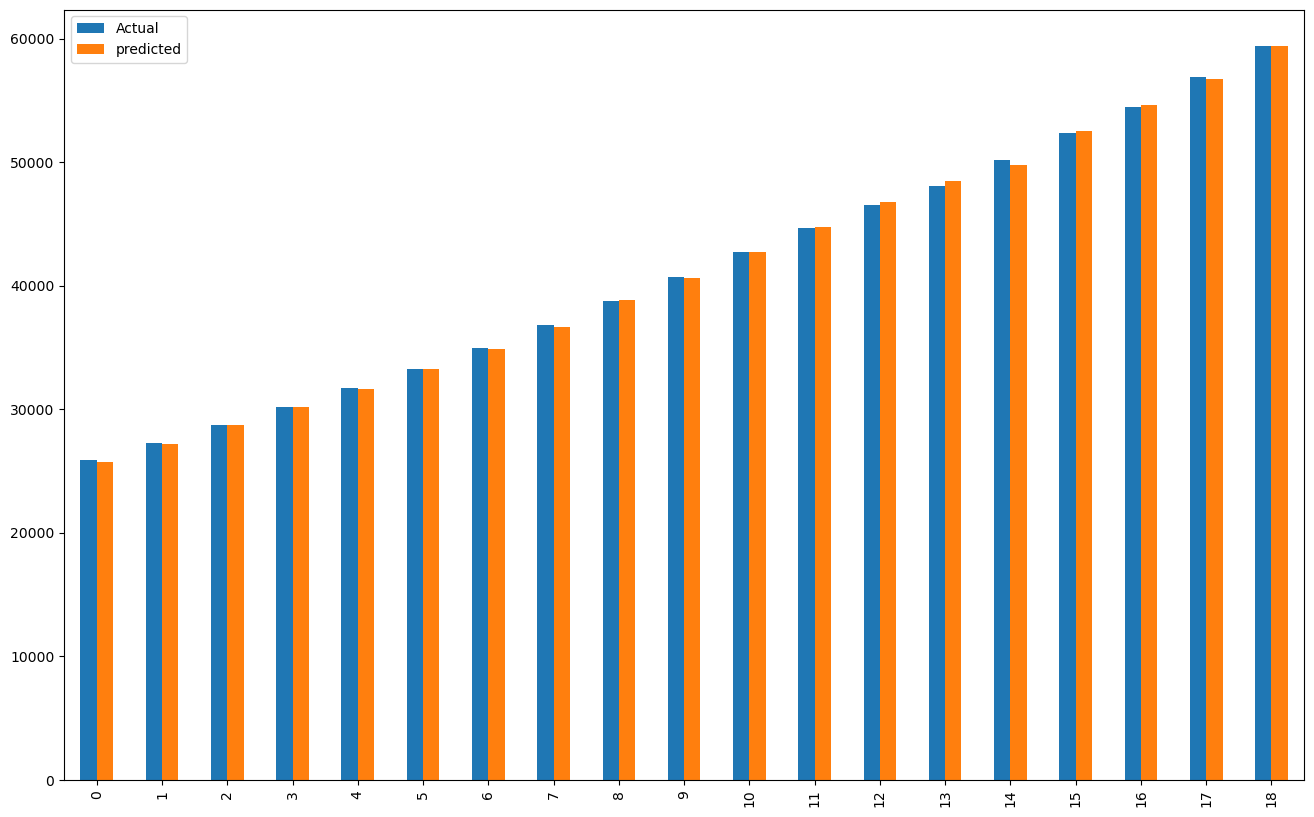

In [107]:
df.plot(kind='bar',figsize=(16,10))